# 데이터 불러오기

In [53]:
# 데이터 불러오기
import pandas as pd

total = pd.read_csv(r"C:\Users\james\Traffic_Volume_Prediction\Data\refined_data.csv")
total

,일자,Hour,1005004000_velocity,1050003300_velocity,1050020400_velocity,1070000200_velocity,1070000500_velocity,1070001600_velocity,D-08 유입_traffic,D-08 유출_traffic,F-03 유입_traffic,F-04 유출_traffic,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,20220419,1,39.82,73.83,18.79,76.42,66.08,90.92,550.0,712.0,1079.0,969.0,11.4,NaN,1.4,63.0,NaN
1,20220419,2,42.19,76.08,14.66,75.08,68.00,92.50,380.0,625.0,829.0,828.0,11.0,NaN,1.3,68.0,NaN
2,20220419,3,43.04,75.50,16.46,74.25,66.50,92.08,410.0,495.0,689.0,709.0,10.4,NaN,1.7,69.0,NaN
3,20220419,4,34.34,74.42,18.91,76.67,67.42,89.83,624.0,709.0,1020.0,1011.0,10.1,NaN,1.0,72.0,NaN
4,20220419,5,35.92,75.83,20.45,76.17,66.83,90.50,1275.0,1222.0,2463.0,2526.0,9.7,NaN,1.1,74.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20758,20240831,20,29.76,73.92,21.85,54.08,64.50,50.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20759,20240831,21,28.94,74.42,21.24,65.00,63.67,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20760,20240831,22,29.84,76.17,22.67,56.75,63.00,44.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20761,20240831,23,29.66,75.92,23.95,64.50,63.92,54.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20763 entries, 0 to 20762
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   일자                   20763 non-null  int64  
 1   Hour                 20763 non-null  int64  
 2   1005004000_velocity  20763 non-null  float64
 3   1050003300_velocity  20728 non-null  float64
 4   1050020400_velocity  20763 non-null  float64
 5   1070000200_velocity  20730 non-null  float64
 6   1070000500_velocity  20730 non-null  float64
 7   1070001600_velocity  20717 non-null  float64
 8   D-08 유입_traffic      13012 non-null  float64
 9   D-08 유출_traffic      13018 non-null  float64
 10  F-03 유입_traffic      19316 non-null  float64
 11  F-04 유출_traffic      19328 non-null  float64
 12  기온(°C)               20006 non-null  float64
 13  강수량(mm)              2538 non-null   float64
 14  풍속(m/s)              19938 non-null  float64
 15  습도(%)                20006 non-null 

In [55]:
total.isnull().sum()

일자                         0
Hour                       0
1005004000_velocity        0
1050003300_velocity       35
1050020400_velocity        0
1070000200_velocity       33
1070000500_velocity       33
1070001600_velocity       46
D-08 유입_traffic         7751
D-08 유출_traffic         7745
F-03 유입_traffic         1447
F-04 유출_traffic         1435
기온(°C)                   757
강수량(mm)                18225
풍속(m/s)                  825
습도(%)                    757
적설(cm)                 19915
dtype: int64

## train, test 분리

In [56]:
total['Year'] = total['일자'].astype(str).str[:4].astype(int)
total['Month'] = total['일자'].astype(str).str[4:6].astype(int)
total['Day'] = total['일자'].astype(str).str[6:8].astype(int)

print(total[['일자', 'Year', 'Month', 'Day']].head())

         일자  Year  Month  Day
0  20220419  2022      4   19
1  20220419  2022      4   19
2  20220419  2022      4   19
3  20220419  2022      4   19
4  20220419  2022      4   19


In [57]:
total = total[~((total['Year'] == 2024) & (total['Month'] == 8))]

In [58]:
train = total[~((total['Year'] == 2024) & (total['Month'] == 7))]
test = total[((total['Year'] == 2024) & (total['Month'] == 7))]
print(train.shape, test.shape)

(19285, 20) (744, 20)


# Feature Engineering

In [59]:
drop_columns=[
    '일자'
]

train = train.copy()
test = test.copy()

for column in drop_columns:
    if column in train.columns:
        train.drop(columns=column, inplace=True)
        test.drop(columns=column, inplace=True)
        print(f"column명: {column} drop을 완료했습니다.")

column명: 일자 drop을 완료했습니다.


# Modeling

## X, y 분리

In [60]:
train.columns

Index(['Hour', '1005004000_velocity', '1050003300_velocity',
       '1050020400_velocity', '1070000200_velocity', '1070000500_velocity',
       '1070001600_velocity', 'D-08 유입_traffic', 'D-08 유출_traffic',
       'F-03 유입_traffic', 'F-04 유출_traffic', '기온(°C)', '강수량(mm)', '풍속(m/s)',
       '습도(%)', '적설(cm)', 'Year', 'Month', 'Day'],
      dtype='object')

In [61]:
# X_train과 y_train 설정
X_train = train.drop(columns=['1005004000_velocity'])
y_train = train[['1005004000_velocity']]

# X_test와 y_test 설정
X_test = test.drop(columns=['1005004000_velocity'])
y_test = test[['1005004000_velocity']]


## Sliding Window 방식의 모델링

In [62]:
# import pandas as pd
# import lightgbm as lgb
# from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.model_selection import TimeSeriesSplit

# N_TEST = 12
# N_SPLIT = 27

# tscv = TimeSeriesSplit(n_splits=N_SPLIT)
# prev_val_idx = 0

# trials = 1

# # 모델 및 평가 지표 초기화
# mape_scores = []
# for train_idx, val_idx in tscv.split(X_train):
#     if trials <= N_SPLIT - N_TEST:
#         trials+=1
#         continue

#     X_tr, X_val = X_train.iloc[prev_val_idx:train_idx[-1]], X_train.iloc[val_idx]
#     y_tr, y_val = y_train.iloc[prev_val_idx:train_idx[-1]], y_train.iloc[val_idx]
    
#     # LightGBM 모델 학습 (MAPE 손실 함수 사용)
#     model = lgb.LGBMRegressor(objective='mape', verbose=-1)
#     model.fit(X_tr, y_tr.values.ravel()) 
    
#     # 예측 및 성능 평가
#     y_pred = model.predict(X_val)
#     mape = mean_absolute_percentage_error(y_val, y_pred)
#     mape_scores.append(mape)

#     prev_val_idx += len(val_idx)
#     print(f"Validation MAPE: {mape}")

# #  테스트 세트 예측
# model = lgb.LGBMRegressor(objective='mape', verbose=-1)
# model.fit(X_train, y_train.values.ravel()) 
# y_test_pred = model.predict(X_test)
# test_mape = mean_absolute_percentage_error(y_test, y_test_pred)


# # 결과 출력
# print("")
# print("Results: ")
# print("Average Validation MAPE:", sum(mape_scores) / len(mape_scores))
# print("Final Test MAPE:", test_mape)

# Results: 
# Average Validation MAPE: 0.08974671124807292
# Final Test MAPE: 0.07499468314017955

In [63]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

N_TEST = 12
N_SPLIT = 27

tscv = TimeSeriesSplit(n_splits=N_SPLIT)

trials = 1

# 모델 및 평가 지표 초기화
mape_scores = []
for train_idx, val_idx in tscv.split(X_train):
    if trials <= N_SPLIT - N_TEST:
        trials+=1
        continue

    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # LightGBM 모델 학습 (MAPE 손실 함수 사용)
    model = lgb.LGBMRegressor(objective='mape', verbose=-1)
    model.fit(X_tr, y_tr.values.ravel()) 
    
    # 예측 및 성능 평가
    y_pred = model.predict(X_val)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    mape_scores.append(mape)
    print(f"Validation MAPE: {mape}")

#  테스트 세트 예측
model = lgb.LGBMRegressor(objective='mape', verbose=-1)
model.fit(X_train, y_train.values.ravel()) 
y_test_pred = model.predict(X_test)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# 결과 출력
print("")
print("Results: ")
print("Average Validation MAPE:", sum(mape_scores) / len(mape_scores))
print("Final Test MAPE:", test_mape)

# Average Validation MAPE: 0.08936708334257591

Validation MAPE: 0.08005249275872181
Validation MAPE: 0.08731282568875856
Validation MAPE: 0.11277555214942014
Validation MAPE: 0.1319277016800677
Validation MAPE: 0.09819181684368518
Validation MAPE: 0.08165097354191056
Validation MAPE: 0.07085074617463595
Validation MAPE: 0.07404189872657062
Validation MAPE: 0.07884162451307045
Validation MAPE: 0.07552155165455367
Validation MAPE: 0.09605100075189492
Validation MAPE: 0.08209799084698521

Results: 
Average Validation MAPE: 0.08910968127752289
Final Test MAPE: 0.07499468314017955


# Analysis

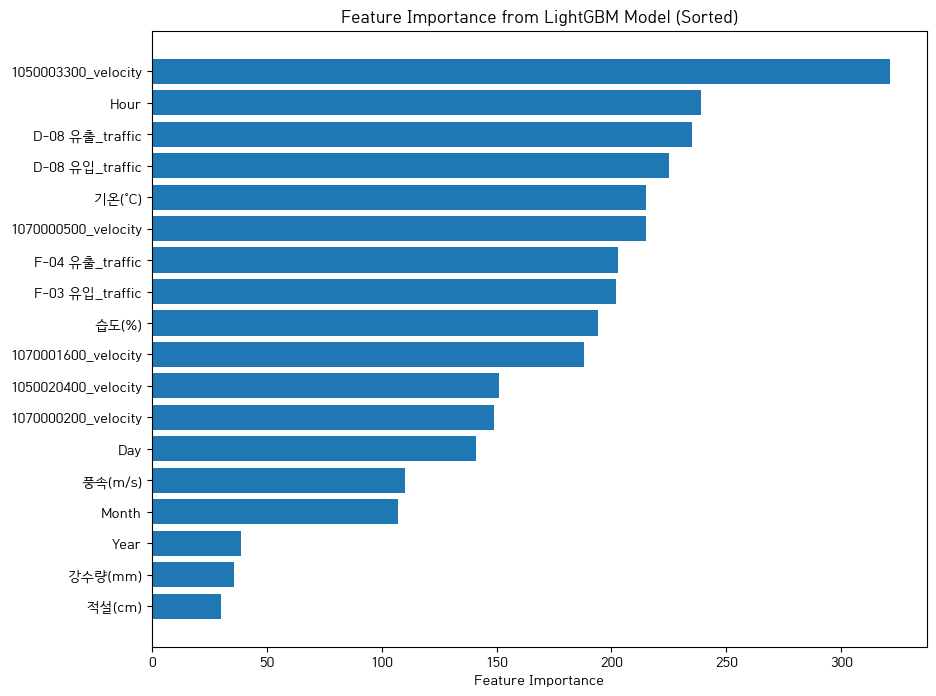

 98%|===================| 18963/19285 [00:40<00:00]        

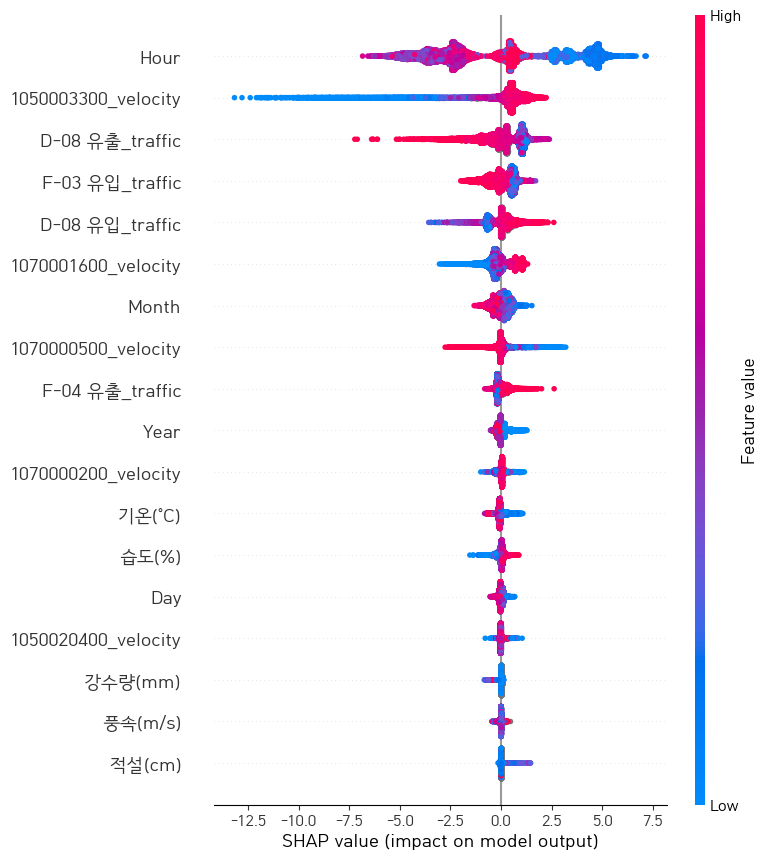

In [64]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import numpy as np

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/HANDotum.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False  
import shap

# 1. Feature Importance (LightGBM 제공)
# Feature importance 시각화
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Feature Importance 정렬 (내림차순)
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = X_train.columns[sorted_idx]

# 정렬된 중요도 막대그래프
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_feature_importances, align='center')
plt.xlabel("Feature Importance")
plt.title("Feature Importance from LightGBM Model (Sorted)")
plt.gca().invert_yaxis()  # y축을 내림차순으로 정렬
plt.show()

# 2. SHAP Analysis
# SHAP 값을 계산하고, 각 feature의 영향력을 시각화
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Summary plot: 전체 feature의 SHAP 값 시각화
shap.summary_plot(shap_values, X_train)

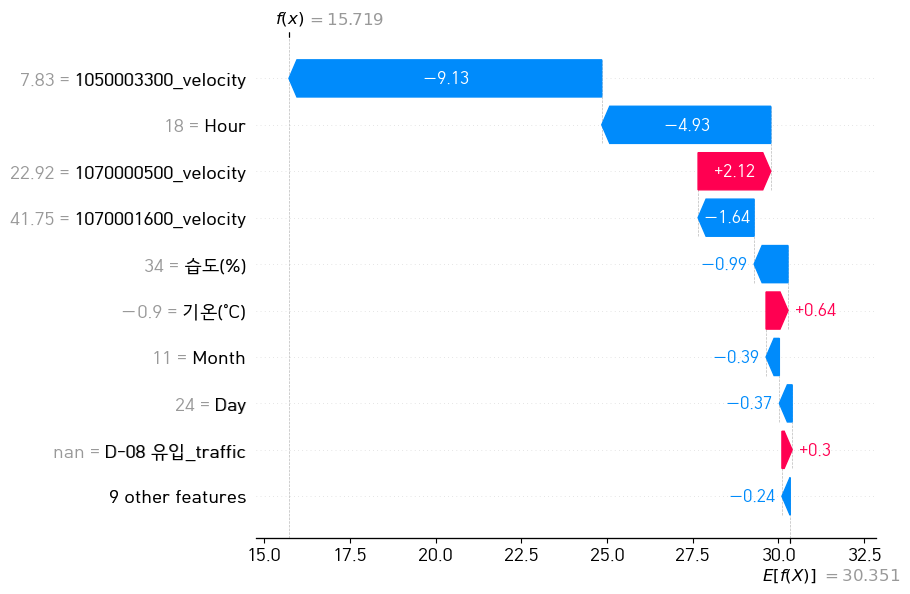

In [65]:
# 첫 번째 데이터 포인트의 SHAP waterfall plot 생성
shap.waterfall_plot(shap_values[14022])  # 첫 번째 데이터 포인트의 SHAP 값 사용

# 그래프 표시
plt.show()